In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings('ignore')

colors = sns.color_palette()
# sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
observation_hours = 7 # 假定游戏以及上线7小时
expected_installed = 60 # 预期每小时有60人安装
loading_times = []
loading_times_averages = []
np.random.seed(12)

In [3]:
for ix, installs in enumerate(np.random.poisson(lam=expected_installed,
                                                size=observation_hours)):
    loading_times.append(np.random.gamma(shape=3, scale=0.95, size=installs))
    loading_times_averages.append(loading_times[ix].mean())

In [4]:
loading_times_averages

[2.5594822719671995,
 2.4433194704013266,
 2.8202190075310756,
 2.9581007316922614,
 2.919595725992928,
 2.9288291251125416,
 3.362178094943785]

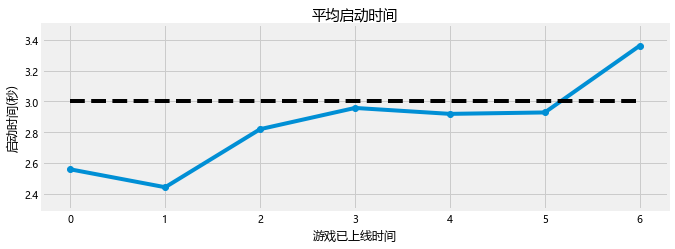

In [4]:
fix, ax = plt.subplots(figsize=(10, 3.4))
ax.plot(loading_times_averages, marker='o')
ax.plot([0, observation_hours-1], [3, 3], '--', color='black')  # 这条是水平线
ax.set(title='平均启动时间', xlabel='游戏已上线时间', ylabel='启动时间(秒)', ylim=(2.3, 3.5));

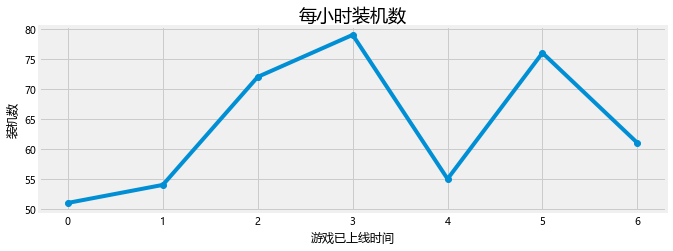

In [5]:
fig, ax = plt.subplots(figsize=(10, 3.4))
plt.plot([len(x)for x in loading_times], marker='o')
plt.title('每小时装机数', fontsize=18)
plt.xlabel('游戏已上线时间')
plt.ylabel('装机数')
plt.show()

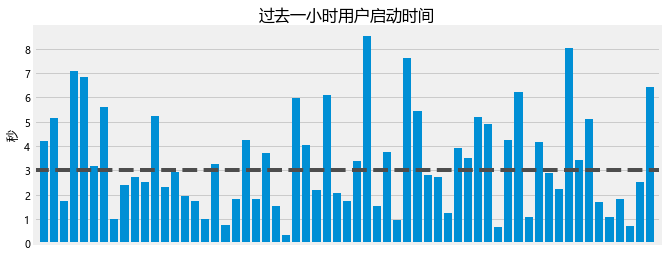

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.bar(range(loading_times[6].shape[0]), loading_times[6], align='center')
plt.plot([-1, 100], [3, 3], '--', color='0.3')
plt.xlim(-1, 61)
plt.title('过去一小时用户启动时间', fontsize=16)
plt.ylabel('秒')
plt.xticks([])
plt.show()

In [7]:
from scipy import stats

In [9]:
t, p = stats.ttest_1samp(loading_times[6], popmean=3)

In [10]:
t, p

(1.38005787853313, 0.1726896360867253)

In [8]:
x = loading_times[6]
SE = stats.sem(x)  # 标准误 就是x/sqrt{n}
t_c = stats.t.ppf(0.975, df=len(x)-1)
CI = x.mean() - t_c*SE, x.mean() + t_c*SE

In [12]:
CI

(2.837226159651679, 3.887130030235891)

In [13]:
loading_times

[array([1.71447529, 3.33923365, 4.64225553, 1.07712817, 4.45110097,
        1.36362994, 3.39439402, 2.7548939 , 1.13135388, 0.71749513,
        0.64867542, 1.7988347 , 2.47299197, 2.15950285, 2.64868012,
        2.58867441, 1.62043667, 5.2221016 , 3.06054662, 2.35920242,
        7.84540896, 2.91139303, 4.13174037, 4.42501085, 2.45440519,
        2.78939201, 1.57670548, 4.29718326, 3.12965268, 3.49759291,
        2.89479368, 1.12060349, 1.26773733, 5.40484808, 0.71352842,
        1.88284859, 2.23361517, 1.74576252, 1.70793506, 2.23651913,
        2.95463767, 0.47669051, 2.76756753, 1.96485899, 1.03894433,
        2.97983655, 1.30763884, 1.78888023, 2.85294773, 2.55813377,
        2.41117625]),
 array([1.17885296, 1.5032188 , 5.66120065, 1.72704629, 3.29917118,
        1.66287944, 1.01786865, 1.02585622, 2.59220084, 2.17026951,
        1.63620553, 3.11839813, 1.52385443, 2.93993228, 2.72859095,
        6.16154968, 2.81921052, 2.58331076, 1.5582705 , 4.07851162,
        0.25520334, 3.8615

In [9]:
loading_performance = pd.DataFrame(loading_times_averages, columns=['loadingtime'])
loading_performance['installs'] = [len(x) for x in loading_times]  # 处理的是每一个小时
loading_performance['SE'] = [stats.sem(x) for x in loading_times]
loading_performance['t_critical'] = stats.t.ppf(0.975, df=loading_performance['installs']-1)
loading_performance['CI_low'] = loading_performance['loadingtime'] -\
                    loading_performance['t_critical']*loading_performance['SE']
loading_performance['CI_high'] = loading_performance['loadingtime'] +\
                    loading_performance['t_critical']*loading_performance['SE']

loading_performance

,loadingtime,installs,SE,t_critical,CI_low,CI_high
0,2.559482,51,0.196072,2.008559,2.165660,2.953305
1,2.443319,54,0.183372,2.005746,2.075521,2.811118
2,2.820219,72,0.198834,1.993943,2.423755,3.216683
3,2.958101,79,0.175907,1.990847,2.607897,3.308305
4,2.919596,55,0.257128,2.004879,2.404086,3.435105
5,2.928829,76,0.190776,1.992102,2.548783,3.308875
6,3.362178,61,0.262437,2.000298,2.837226,3.887130


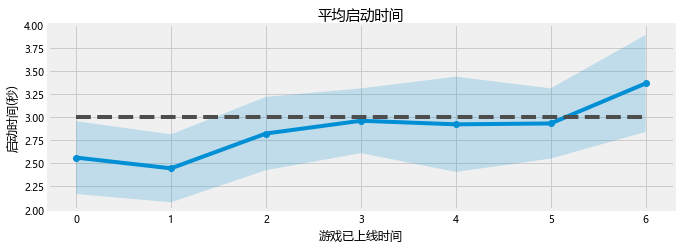

In [10]:
fig, ax = plt.subplots(figsize=(10, 3.4))
ax.plot(loading_times_averages, marker='o')
ax.plot([0, observation_hours-1], [3, 3], '--', color='0.3')
ax.fill_between(loading_performance.index, loading_performance['CI_low'],
                loading_performance['CI_high'], alpha=0.2,
               where=loading_performance['CI_low']<loading_performance['CI_high'])
# where的意思是,如果不满足就没有,不会出现倒着

ax.set(xlabel='游戏已上线时间', ylabel='启动时间(秒)', ylim=(2, 4), title='平均启动时间')
plt.show()

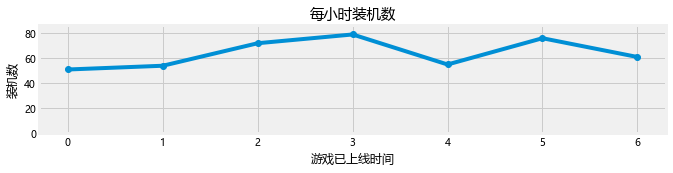

In [11]:
plt.subplots(figsize=(10, 2))
plt.plot(loading_performance['installs'], marker='o')
plt.ylim(0, loading_performance['installs'].max()*1.1)
plt.title('每小时装机数')
plt.xlabel('游戏已上线时间')
plt.ylabel('装机数')
plt.show()

In [12]:
observation_hours = 24
expected_installs = 60
np.random.seed(23)
loading_times2 = list(loading_times)
loading_times_average2 = list(loading_times_averages)

In [13]:
for ix, installs in enumerate(np.random.poisson(lam=expected_installs,
                                                size=observation_hours)):
    loading_times2.append(np.random.gamma(shape=3, scale=0.95, size=installs))
    loading_times_average2.append(loading_times2[ix].mean())

In [14]:
loading_performance = pd.DataFrame(loading_times_average2, columns=['loadingtime'])
loading_performance['installs'] = [len(x) for x in loading_times2]
loading_performance['SE'] = [stats.sem(x) for x in loading_times2]
loading_performance['t_critical'] = stats.t.ppf(0.975, df=loading_performance['installs']-1)
loading_performance['CI_low'] = loading_performance['loadingtime'] - \
                        loading_performance['t_critical']*loading_performance['SE']
loading_performance['CI_high'] = loading_performance['loadingtime'] + \
                        loading_performance['t_critical']*loading_performance['SE']
loading_performance.sample(3)

,loadingtime,installs,SE,t_critical,CI_low,CI_high
5,2.928829,76,0.190776,1.992102,2.548783,3.308875
16,2.351526,49,0.271971,2.010635,1.804693,2.898360
13,3.362178,69,0.162814,1.995469,3.037288,3.687068


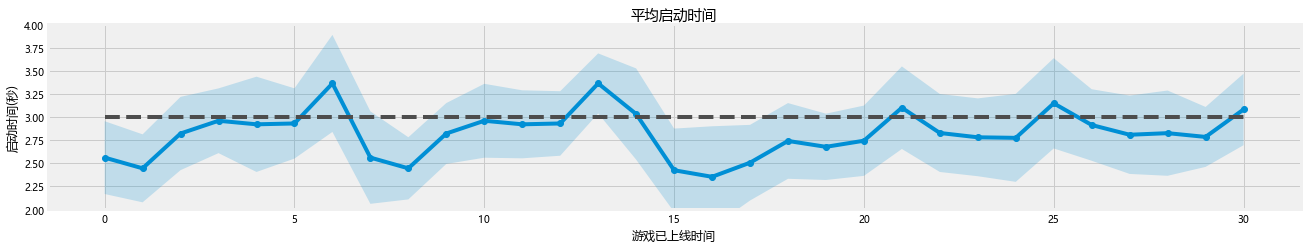

In [15]:
fig, ax = plt.subplots(figsize=(20, 3.4))
ax.plot(loading_times_average2, marker='o')
ax.plot([0, observation_hours+6], [3, 3], '--', color='0.3')
ax.fill_between(loading_performance.index, loading_performance['CI_low'],
                loading_performance['CI_high'], alpha=0.2,
               where=loading_performance['CI_low']<loading_performance['CI_high'])
# where的意思是,如果不满足就没有,不会出现倒着

ax.set(xlabel='游戏已上线时间', ylabel='启动时间(秒)', ylim=(2, 4), title='平均启动时间')
plt.show()

In [16]:
installs = 448
returned = 123
p = returned / installs
print(f'装机数={installs}\n次日留存{returned}\n次日留存率={round(p*100, 2)}%\n目标留存率={30}%')

装机数=448
次日留存123
次日留存率=27.46%
目标留存率=30%


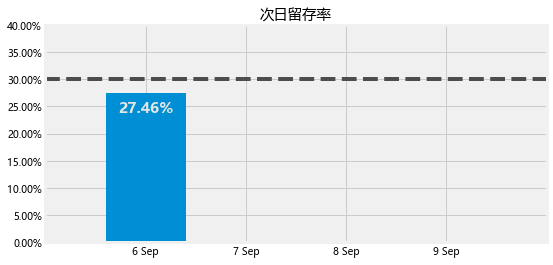

In [17]:
from matplotlib.ticker import FuncFormatter


fig, ax = plt.subplots(figsize=(8, 4))
ax.bar([1], [p], align='center', width=0.8)
ax.plot([0, 100], [0.3, 0.3], '--', color='0.3')
ax.set(xticks=range(1, 5), xlim=(0, 5), ylim=(0, 0.40), title='次日留存率')
ax.set_xticklabels(['{} Sep'.format(d+5) for d in range(1, 5)])
# ax.set_xticks(range(1, 10))
ax.text(1, p*0.95, '{:.2f}%'.format(p*100),
        horizontalalignment='center', verticalalignment='top',
        fontdict={'size':15, 'weight':'bold', 'color':(0.9, 0.9, 0.9)})
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.2f}%'.format(x*100)))
plt.show()

In [36]:
plt.show()

In [21]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [19]:
z, p = proportions_ztest(returned, installs, value=0.3, alternative='smaller', prop_var=0.3)

In [20]:
z, p

(-1.175320190850308, 0.11993331980861971)

In [22]:
ci_low, ci_upp = proportion_confint(returned, installs)
ci_low, ci_upp

(0.2332273873122249, 0.31587975554491804)

In [25]:
control_installs = 2501
control_connected = 1104
test_installs = 2141
test_connected = 1076
print(f'类别{"A"}:装机数:{control_installs}\t关联微信数:{control_connected}\t比例:{control_connected/control_installs}')
print(f'类别{"B"}:装机数:{test_installs}\t关联微信数:{test_connected}\t比例:{test_connected/test_installs}')

类别A:装机数:2501	关联微信数:1104	比例:0.4414234306277489
类别B:装机数:2141	关联微信数:1076	比例:0.5025688930406352


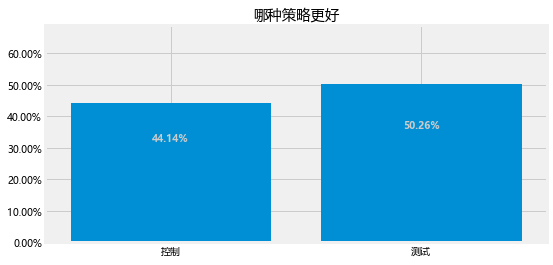

In [34]:
from matplotlib.ticker import FuncFormatter


fig, ax = plt.subplots(figsize=(8, 4))
x = [0, 1]
y = [control_connected/control_installs, test_connected/test_installs]
ax.bar(x, y, align='center', width=0.8)
ax.set_xticks(x)
ax.set_xticklabels(['控制', '测试'])
ax.set(xlim=(-.5, 1.5), ylim=(0, .69), title='哪种策略更好')
for xx, yy in zip(x, y):
    ax.text(xx, yy*0.7, f'{round(100*yy, 2)}%', ha='center', va='bottom',
           fontdict={'color':(0.8, 0.8, 0.8), 'weight':'bold'})
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:'{:.2f}%'.format(x*100)))
plt.show()

In [36]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([control_connected, test_connected])
nobs = np.array([control_installs, test_installs])
z, p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
z, p

(-4.161114920415351, 3.1669765828788065e-05)

In [37]:
def compute_standard_error_prop_two_samples(x1, n1, x2, n2, alpha=0.05):
    p1 = x1/n1
    p2 = x2/n2
    se = p1*(1-p1)/n1 + p2*(1-p2)/n2
    return np.sqrt(se)

In [38]:
def zconf_interval_two_samples(x1, n1, x2, n2, alpha=0.05):
    p1 = x1/n1
    p2 = x2/n2
    se = compute_standard_error_prop_two_samples(x1, n1, x2, n2, alpha=alpha)
    z_critical = stats.norm.ppf(1-0.5*alpha)
    return p2-p1-z_critical*se, p2-p1+z_critical*se

In [39]:
ci_low, ci_upp = zconf_interval_two_samples(control_connected, control_installs, test_connected, test_installs)
ci_low, ci_upp

(0.0323831754402958, 0.08990774938547684)

In [41]:
conversion_a = 0.015
conversion_b = 0.013
installs_a = 30000
installs_b = 30000
payers_a = int(installs_a * conversion_a)
payers_b = int(installs_b * conversion_b)
print(f"A组付费用户数:{payers_a}")
print(f"B组付费用户数:{payers_b}")

A组付费用户数:450
B组付费用户数:390


In [43]:
from statsmodels.stats.proportion import proportions_ztest


count = np.array([payers_a, payers_b])
nobs = np.array([installs_a, installs_b])
z, p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
z, p

(2.0848420114464243, 0.03708364384057536)

In [46]:
np.random.seed(8)
revenues_a = np.clip(np.random.gamma(0.7, 10, payers_a).astype(np.int), 1, 1000) *\
            np.clip(np.random.gamma(1, 25, payers_a).round(2), 0.99, 99)
# np.clip就是把值限定到一个范围,如果超出范围,就用范围的两边代替
revenues_b = np.clip(np.random.gamma(0.7, 13, payers_b).astype(np.int), 1, 1000) * \
            np.clip(np.random.gamma(1, 30, payers_b).round(2), 2.99, 99)
print(f'A:ARPU={revenues_a.mean()},min={revenues_a.min()},max={revenues_a.max()}')
print(f'B:ARPU={revenues_b.mean()},min={revenues_b.min()},max={revenues_b.max()}')

A:ARPU=151.86206666666666,min=0.99,max=3960.0
B:ARPU=214.2176923076923,min=2.99,max=3647.7999999999997


In [50]:
pd.set_option('display.precision', 2)
pd.DataFrame(data=revenues_a, columns=['0.99']).describe().join(pd.DataFrame(data=revenues_b, columns=['1.99']).describe())

,0.99,1.99
count,450.00,390.00
mean,151.86,214.22
std,325.31,372.41
min,0.99,2.99
25%,20.82,26.52
50%,55.31,69.44
75%,147.27,231.28
max,3960.00,3647.80


,1.99
count,390.00
mean,214.22
std,372.41
min,2.99
25%,26.52
50%,69.44
75%,231.28
max,3647.80


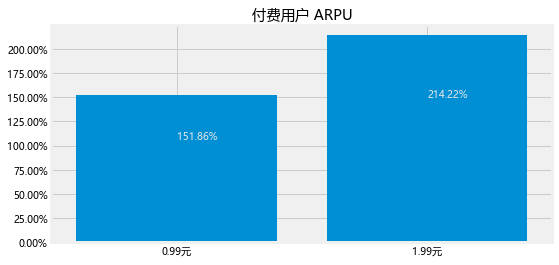

In [54]:
x = [0, 1]
y = [revenues_a.mean(), revenues_b.mean()]

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x, y, align='center', width=.8)
ax.set_xticks(x)
ax.set_xticklabels(['0.99元', '1.99元'])
ax.set_title('付费用户 ARPU')
ax.set_xlim(-.5, 1.5)
for xx, yy in zip(x, y):
    ax.text(xx, yy*0.7, '{:.2f}%'.format(yy), color=(.9, .9, .9))
    
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.2f}%'.format(x)))
plt.show()

In [56]:
revenues_a = np.concatenate([np.zeros(installs_a - payers_a), revenues_a])
revenues_b = np.concatenate([np.zeros(installs_b - payers_b), revenues_b])

In [57]:
print('A:ARPU={}, min={}, max={}'.format(revenues_a.mean(), revenues_a.min(), revenues_a.max()))
print('B:ARPU={}, min={}, max={}'.format(revenues_b.mean(), revenues_b.min(), revenues_b.max()))

A:ARPU=2.2779309999999997, min=0.0, max=3960.0
B:ARPU=2.78483, min=0.0, max=3647.7999999999997


In [59]:
t, p = stats.ttest_ind(revenues_a, revenues_b, axis=0, equal_var=False)
t, p/2

(-1.337055975602803, 0.18120949363567418)

In [61]:
revenues_a_trimmed = np.minimum(revenues_a, 1000)  # 返回两个中小的那一个
revenues_b_trimmed = np.minimum(revenues_b, 1000)
print('A:ARPU={}'.format(revenues_a_trimmed.mean()))
print('B:ARPU={}'.format(revenues_b_trimmed.mean()))

A:ARPU=2.0011756666666667
B:ARPU=2.4898616666666666


In [62]:
t, p = stats.ttest_ind(revenues_a_trimmed, revenues_b_trimmed, axis=0, equal_var=False)
t, p/2

(-1.7854914296667377, 0.03709347599105856)